load the data set


In [ ]:
import pandas as pd
import h5py

In [ ]:
# Load traffic data from HDF5 file
file_path = "/content/METR-LA.h5"  # Update if path is different in Colab
with h5py.File(file_path, 'r') as f:
    # The dataset stores traffic speed readings from sensors and timestamps
    data_group = f['df']  # Get the group named 'df'

    # Now access the dataset within the group
    data = data_group['block0_values'][:]  # Assuming the data is stored in a key like 'block0_values' based on common HDF5 structures
    timestamps = data_group['axis1'][:] # Load timestamps from 'axis1'


print("Data shape:", data.shape)
print("Number of sensors:", data.shape[1])
print("Timestamps shape:", timestamps.shape)

Data shape: (34272, 207)
Number of sensors: 207
Timestamps shape: (34272,)


In [ ]:
# Inspect the keys in the HDF5 file
with h5py.File(file_path, 'r') as f:
    print("Keys available in the HDF5 file:", list(f.keys()))

Keys available in the HDF5 file: ['df']


In [ ]:
# Inspect the keys within the 'df' group in the HDF5 file
file_path = "/content/METR-LA.h5"
with h5py.File(file_path, 'r') as f:
    if 'df' in f:
        data_group = f['df']
        print("Keys available within the 'df' group:", list(data_group.keys()))
    else:
        print("Group 'df' not found in the HDF5 file.")

Keys available within the 'df' group: ['axis0', 'axis1', 'block0_items', 'block0_values']


In [ ]:
# Inspect the content of 'axis0', 'axis1', and 'block0_items' within the 'df' group
file_path = "/content/METR-LA.h5"
with h5py.File(file_path, 'r') as f:
    if 'df' in f:
        data_group = f['df']
        print("Content of 'axis0':", data_group['axis0'][:])
        print("\nContent of 'axis1':", data_group['axis1'][:])
        print("\nContent of 'block0_items':", data_group['block0_items'][:])
    else:
        print("Group 'df' not found in the HDF5 file.")

Content of 'axis0': [b'773869' b'767541' b'767542' b'717447' b'717446' b'717445' b'773062'
 b'767620' b'737529' b'717816' b'765604' b'767471' b'716339' b'773906'
 b'765273' b'716331' b'771667' b'716337' b'769953' b'769402' b'769403'
 b'769819' b'769405' b'716941' b'717578' b'716960' b'717804' b'767572'
 b'767573' b'773012' b'773013' b'764424' b'769388' b'716328' b'717819'
 b'769941' b'760987' b'718204' b'718045' b'769418' b'768066' b'772140'
 b'773927' b'760024' b'774012' b'774011' b'767609' b'769359' b'760650'
 b'716956' b'769831' b'761604' b'717495' b'716554' b'773953' b'767470'
 b'716955' b'764949' b'773954' b'767366' b'769444' b'773939' b'774067'
 b'769443' b'767750' b'767751' b'767610' b'773880' b'764766' b'717497'
 b'717490' b'717491' b'717492' b'717493' b'765176' b'717498' b'717499'
 b'765171' b'718064' b'718066' b'765164' b'769431' b'769430' b'717610'
 b'767053' b'767621' b'772596' b'772597' b'767350' b'767351' b'716571'
 b'773023' b'767585' b'773024' b'717483' b'718379' b'7174

In [ ]:
# Convert timestamps to datetime objects and create a pandas DataFrame
timestamps_datetime = pd.to_datetime(timestamps)
traffic_df = pd.DataFrame(data, index=timestamps_datetime)

# Display the first few rows of the DataFrame
display(traffic_df.head())

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,62.750000,...,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,63.333333,...,50.666667,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000


converting to pandas df

In [ ]:
import numpy as np

In [ ]:
timestamps = pd.to_datetime(timestamps, unit="ns")

In [ ]:
# Inspect a few raw timestamp values
print("First 5 timestamp values:", timestamps[:5])

# Try converting a sample timestamp with different units
sample_timestamp = timestamps[0]
from pandas.errors import OutOfBoundsDatetime
try:
    print("Converting with unit='ns':", pd.to_datetime(sample_timestamp, unit='ns'))
except OutOfBoundsDatetime as e:
    print("Converting with unit='ns' resulted in error:", e)

try:
    print("Converting with unit='ms':", pd.to_datetime(sample_timestamp, unit='ms'))
except OutOfBoundsDatetime as e:
    print("Converting with unit='ms' resulted in error:", e)

try:
    print("Converting with unit='us':", pd.to_datetime(sample_timestamp, unit='us'))
except OutOfBoundsDatetime as e:
    print("Converting with unit='us' resulted in error:", e)

try:
    print("Converting with unit='s':", pd.to_datetime(sample_timestamp, unit='s'))
except OutOfBoundsDatetime as e:
    print("Converting with unit='s' resulted in error:", e)

First 5 timestamp values: [1330560000000000000 1330560300000000000 1330560600000000000
 1330560900000000000 1330561200000000000]
Converting with unit='ns': 2012-03-01 00:00:00
Converting with unit='ms' resulted in error: Out of bounds nanosecond timestamp: 42165737-11-28 00:00:00
Converting with unit='us' resulted in error: Out of bounds nanosecond timestamp: 44133-10-08 00:00:00
Converting with unit='s' resulted in error: Out of bounds nanosecond timestamp: 42163769877-08-16 00:00:00


In [ ]:
df = pd.DataFrame(data, index=timestamps)
df.index.name = "timestamp"

print(df.head())

                           0          1          2          3          4    \
timestamp                                                                    
2012-03-01 00:00:00  64.375000  67.625000  67.125000  61.500000  66.875000   
2012-03-01 00:05:00  62.666667  68.555556  65.444444  62.444444  64.444444   
2012-03-01 00:10:00  64.000000  63.750000  60.000000  59.000000  66.500000   
2012-03-01 00:15:00   0.000000   0.000000   0.000000   0.000000   0.000000   
2012-03-01 00:20:00   0.000000   0.000000   0.000000   0.000000   0.000000   

                           5       6       7          8          9    ...  \
timestamp                                                             ...   
2012-03-01 00:00:00  68.750000  65.125  67.125  59.625000  62.750000  ...   
2012-03-01 00:05:00  68.111111  65.000  65.000  57.444444  63.333333  ...   
2012-03-01 00:10:00  66.250000  64.500  64.250  63.875000  65.375000  ...   
2012-03-01 00:15:00   0.000000   0.000   0.000   0.000000   0.000000

preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sensor_id = 0
traffic_series = df.iloc[:, sensor_id].values

In [ ]:
scaler = StandardScaler()
traffic_scaled = scaler.fit_transform(traffic_series.reshape(-1,1))

print("Scaled series shape:", traffic_scaled.shape)

Scaled series shape: (34272, 1)


creating time series dataset

In [ ]:
def create_dataset(series, seq_length=12):
    X, y = [], []
    for i in range(len(series) - seq_length):
        X.append(series[i:i+seq_length])
        y.append(series[i+seq_length])
    return np.array(X), np.array(y)
sequence_length = 12
X, y = create_dataset(traffic_scaled, seq_length=sequence_length)

print("X shape:", X.shape)  # (samples, seq_length, 1)
print("y shape:", y.shape)

X shape: (34260, 12, 1)
y shape: (34260, 1)


train test split

In [ ]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 27408
Testing samples: 6852


lstm model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTM Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2292 - val_loss: 0.0617
Epoch 2/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0926 - val_loss: 0.0758
Epoch 3/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0984 - val_loss: 0.0769
Epoch 4/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0941 - val_loss: 0.0644
Epoch 5/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0970 - val_loss: 0.0634
Epoch 6/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0979 - val_loss: 0.0574
Epoch 7/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0956 - val_loss: 0.0583
Epoch 8/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0966 - val_loss: 0.0568
Epoch 9/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0928 - val_loss: 0.0579
Epoch 10/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0909 - val_loss: 0.0588


eval

215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


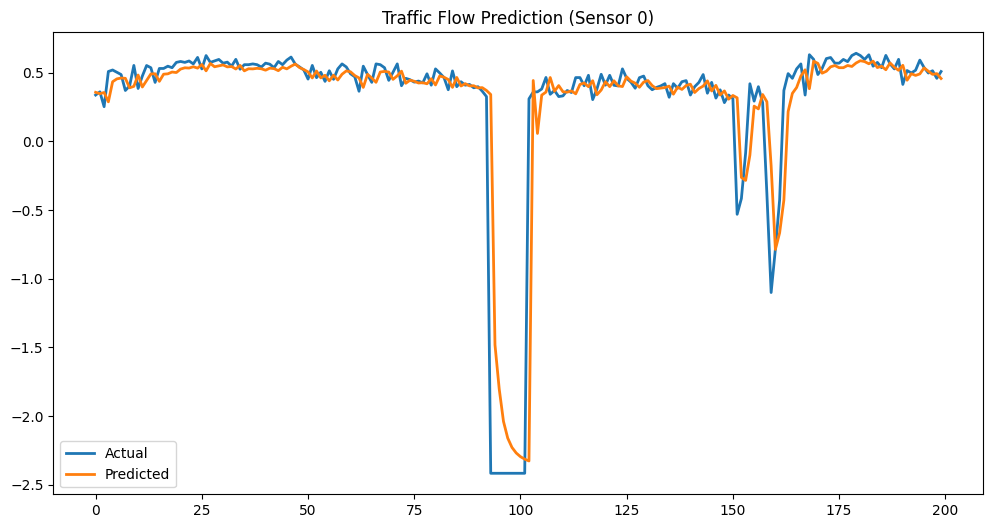

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(y_test[:200], label="Actual", linewidth=2)
plt.plot(y_pred[:200], label="Predicted", linewidth=2)
plt.legend()
plt.title("Traffic Flow Prediction (Sensor {})".format(sensor_id))
plt.show()


xgboost and lstm


Data shape: (34272, 207)
X_train: (27408, 12, 1) X_test: (6852, 12, 1)
XGBoost MSE: 0.07996138857654711
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2188 - val_loss: 0.0689
Epoch 2/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0956 - val_loss: 0.0640
Epoch 3/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1007 - val_loss: 0.0581
Epoch 4/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0881 - val_loss: 0.0634
Epoch 5/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0966 - val_loss: 0.0577
Epoch 6/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0974 - val_loss: 0.0603
Epoch 7/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0912 - val_loss: 0.0576
Epoch 8/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0978 - val_loss: 0.0598
Epoch 9/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1001 - val_loss: 0.0575
Epoch 10/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0972 - val_loss: 0.0658
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM MSE: 0.08218802306764766


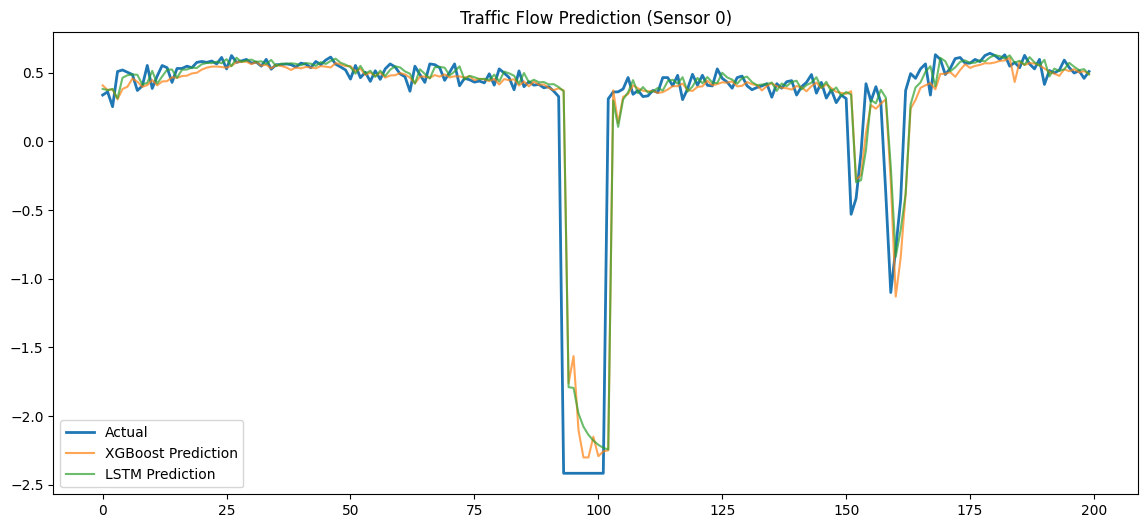

In [ ]:
import pandas as pd
import numpy as np
import h5py
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from xgboost import XGBRegressor

# ---------------- Step 1: Load METR-LA dataset ----------------
file_path = "/content/METR-LA.h5"
with h5py.File(file_path, 'r') as f:
    data_group = f['df']
    data = data_group['block0_values'][:]
    timestamps = data_group['axis1'][:]


timestamps = pd.to_datetime(timestamps, unit="ns")
df = pd.DataFrame(data, index=timestamps)
df.index.name = "timestamp"
print("Data shape:", df.shape)

# ---------------- Step 2: Select one sensor ----------------
sensor_id = 0
traffic_series = df.iloc[:, sensor_id].values

# Scale
scaler = StandardScaler()
traffic_scaled = scaler.fit_transform(traffic_series.reshape(-1,1))

# ---------------- Step 3: Create sequences ----------------
def create_dataset(series, seq_length=12):
    X, y = [], []
    for i in range(len(series) - seq_length):
        X.append(series[i:i+seq_length])
        y.append(series[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 12
X, y = create_dataset(traffic_scaled, seq_length=sequence_length)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("X_train:", X_train.shape, "X_test:", X_test.shape)

# ---------------- Step 4A: XGBoost Model ----------------

# Flatten for XGBoost (tabular format)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train_flat, y_train)

y_pred_xgb = xgb_model.predict(X_test_flat)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost MSE:", mse_xgb)

# ---------------- Step 4B: LSTM Model ----------------

lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

y_pred_lstm = lstm_model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("LSTM MSE:", mse_lstm)

# ---------------- Step 5: Visualization ----------------
plt.figure(figsize=(14,6))
plt.plot(y_test[:200], label="Actual", linewidth=2)
plt.plot(y_pred_xgb[:200], label="XGBoost Prediction", alpha=0.7)
plt.plot(y_pred_lstm[:200], label="LSTM Prediction", alpha=0.7)
plt.legend()
plt.title("Traffic Flow Prediction (Sensor {})".format(sensor_id))
plt.show()

streamlit app

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
!pip install streamlit pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ---------------- Load Dataset ----------------
@st.cache_data
def load_data(file_path):
    with h5py.File(file_path, 'r') as f:
        data_group = f['df']
        data = data_group['block0_values'][:]
        timestamps = data_group['axis1'][:]
    timestamps = pd.to_datetime(timestamps, unit="ns")
    df = pd.DataFrame(data, index=timestamps)
    df.index.name = "timestamp"
    return df

df = load_data("METR-LA.h5")   # <-- keep dataset in same folder
st.title("🚦 AI-Driven Traffic Flow Optimization")
st.write("Using **XGBoost & LSTM** to predict traffic flow from METR-LA dataset.")

# ---------------- User Inputs ----------------
sensor_id = st.selectbox("Select Sensor ID", range(df.shape[1]), index=0)
sequence_length = st.slider("Sequence Length (minutes)", 6, 24, 12)

# ---------------- Data Preparation ----------------
traffic_series = df.iloc[:, sensor_id].values
scaler = StandardScaler()
traffic_scaled = scaler.fit_transform(traffic_series.reshape(-1,1))

def create_dataset(series, seq_length=12):
    X, y = [], []
    for i in range(len(series) - seq_length):
        X.append(series[i:i+seq_length])
        y.append(series[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_dataset(traffic_scaled, seq_length=sequence_length)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ---------------- XGBoost Model ----------------
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train_flat, y_train)
y_pred_xgb = xgb_model.predict(X_test_flat)

# ---------------- LSTM Model ----------------
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=3, batch_size=64, verbose=0)
y_pred_lstm = lstm_model.predict(X_test)

# ---------------- Visualization ----------------
st.subheader("Traffic Flow Prediction (Sensor {})".format(sensor_id))
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(y_test[:200], label="Actual", linewidth=2)
ax.plot(y_pred_xgb[:200], label="XGBoost Prediction", alpha=0.7)
ax.plot(y_pred_lstm[:200], label="LSTM Prediction", alpha=0.7)
ax.legend()
st.pyplot(fig)

# ---------------- Metrics ----------------
from sklearn.metrics import mean_squared_error
st.write("📊 **XGBoost MSE:**", mean_squared_error(y_test, y_pred_xgb))
st.write("📊 **LSTM MSE:**", mean_squared_error(y_test, y_pred_lstm))

Overwriting app.py


In [50]:
!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.169.62.194


In [ ]:
!streamlit run app.py --server.port 8501 & npx localtunnel --port 8501




2025-08-19 08:01:12.392 Port 8501 is already in use
⠙⠹⠸⠼⠴⠦⠧⠇your url is: https://rich-gifts-buy.loca.lt
